# Introduction

In this exercise, we will introduce the networkx library in Python. We will start by defining graphs and their components, such as nodes, edges, and their types. Then, we will explore the networkx library and how it can be used to create, manipulate, and analyze graphs. Finally, we will explore types of graphs and estimate their connectivity.

In [1]:
! pip install matplotlib
! pip install networkx

  Using cached matplotlib-3.9.2-cp310-cp310-win_amd64.whl (7.8 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ---------------------------------------- 0.0/55.9 kB ? eta -:--:--
     --------------------- ------------------ 30.7/55.9 kB ? eta -:--:--
     -------------------------------------- 55.9/55.9 kB 992.1 kB/s eta 0:00:00
  Using cached pyparsing-3.1.4-py3-none-any.whl (104 kB)
  Using cached fonttools-4.53.1-cp310-cp310-win_amd64.whl (2.2 MB)
  Using cached pillow-10.4.0-cp310-cp310-win_amd64.whl (2.6 MB)
  Using cached contourpy-1.3.0-cp310-cp310-win_amd64.whl (216 kB)
  Using cached numpy-2.1.1-cp310-cp310-win_amd64.whl (12.9 MB)



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached networkx-3.3-py3-none-any.whl (1.7 MB)



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import random
from typing import List, Optional

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
def seed_everything(seed: Optional[int] = None) -> None:
    random.seed(seed)
    np.random.seed(seed)


seed_everything(42)

#explain why we may need this function?

# Components of a Network

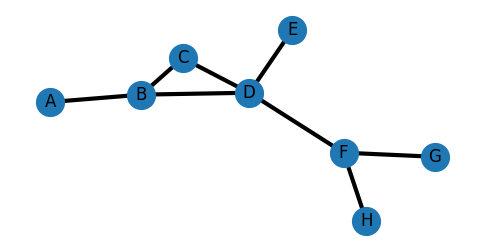

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

edge_list = [
    (0, 1),
    (1, 2),
    (1, 3),
    (2, 3),
    (3, 4),
    (3, 5),
    (5, 6),
    (5, 7)
]

G = nx.Graph(edge_list)

node_labels = {
    0: "A",
    1: "B",
    2: "C",
    3: "D",
    4: "E",
    5: "F",
    6: "G",
    7: "H",
}

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
ax.set_axis_off()
ax = fig.add_subplot(1, 1, 1)
nx.draw(G, ax=ax, node_color="tab:blue", node_size=400, width=3, labels=node_labels)
plt.show()


In [8]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7))

In [9]:
G.edges

EdgeView([(0, 1), (1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (5, 6), (5, 7)])

Make new connections between nodes - H and G; E and C;

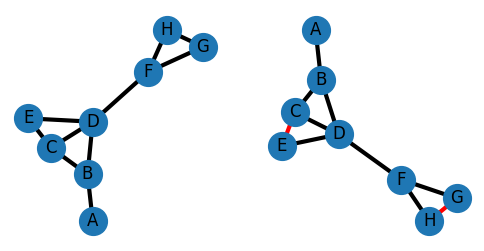

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

ax[0].set_axis_off()
ax[0] = fig.add_subplot(1, 2, 1)
nx.draw(G, ax=ax[0], node_color="tab:blue", node_size=400, width=3, labels=node_labels)

G.add_edge(7, 6, color="red")
G.add_edge(4, 2, color="red")

ax[1].set_axis_off()
ax[1] = fig.add_subplot(1, 2, 2)
nx.draw(G, ax=ax[1], node_color="tab:blue", node_size=400, width=3,
        labels=node_labels, edge_color=[G[u][v]["color"] if len(G[u][v])!=0 else "black" for u,v in G.edges])

plt.show()

In [13]:
for u,v in G.edges:
    print(u, v, G[u][v])

0 1 {}
1 2 {}
1 3 {}
2 3 {}
2 4 {'color': 'red'}
3 4 {}
3 5 {}
5 6 {}
5 7 {}
6 7 {'color': 'red'}


# Directed vs. Unidirected Graphs

## Undirected

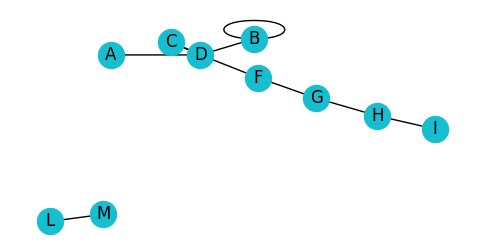

In [29]:
import matplotlib.pyplot as plt
import networkx as nx

edge_list = [
    ("A", "D"),
    ("B", "B"),
    ("B", "D"),
    ("C", "D"),
    ("C", "D"),
    ("D", "F"),
    ("F", "G"),
    ("G", "H"),
    ("H", "I"),
    ("L", "M"),
]
G = nx.MultiGraph(edge_list)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
ax.set_axis_off()
ax = fig.add_subplot(1, 1, 1)
nx.draw(G, ax=ax, node_color="tab:cyan", node_size=350, with_labels=True)
plt.show()

## Directed

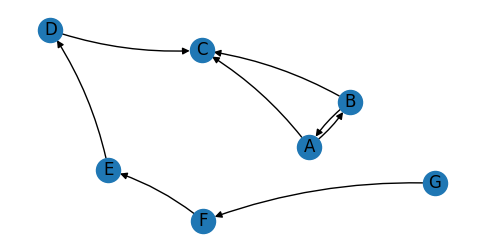

In [30]:
edge_list = [
    ("A", "B"),
    ("A", "C"),
    ("B", "A"),
    ("B", "C"),
    ("D", "C"),
    ("E", "D"),
    ("F", "E"),
    ("G", "F")
]
G = nx.MultiDiGraph(edge_list)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
ax.set_axis_off()
ax = fig.add_subplot(1, 1, 1)
nx.draw_networkx(G, ax=ax, node_color="tab:blue", with_labels=True, connectionstyle="arc3, rad = 0.1")
plt.axis("off")
plt.show()

# Heterogeneous Graphs

A heterogeneous graph is a graph that contains nodes and edges of different types. In a homogeneous graph, all nodes and edges are of the same type. For example, a social network graph might have nodes that represent people and edges that represent friendships. In a heterogeneous graph, the nodes might represent people, organizations, or even events, and the edges might represent friendships, collaborations, or even financial transactions.

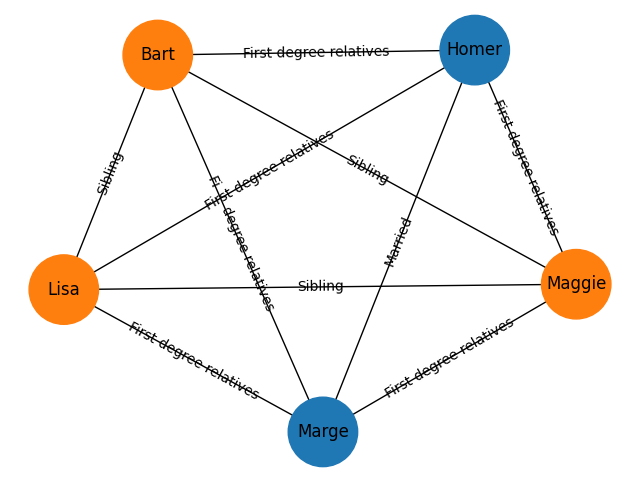

In [31]:
edge_list = [
    ("Marge", "Homer", {"relation_type": "Married"}),
    ("Marge", "Lisa", {"relation_type": "First degree relatives"}),
    ("Marge", "Bart", {"relation_type": "First degree relatives"}),
    ("Marge", "Maggie", {"relation_type": "First degree relatives"}),
    ("Homer", "Lisa", {"relation_type": "First degree relatives"}),
    ("Homer", "Bart", {"relation_type": "First degree relatives"}),
    ("Homer", "Maggie", {"relation_type": "First degree relatives"}),
    ("Lisa", "Bart", {"relation_type": "Sibling"}),
    ("Lisa", "Maggie", {"relation_type": "Sibling"}),
    ("Bart", "Maggie", {"relation_type": "Sibling"}),
]
G = nx.Graph(edge_list)
node_attributes = {
    "Marge": {"node_type": "Adult"},
    "Homer": {"node_type": "Adult"},
    "Lisa": {"node_type": "Child"},
    "Bart": {"node_type": "Child"},
    "Maggie": {"node_type": "Child"},
}
nx.set_node_attributes(G, node_attributes)

node_type_to_color = {
    "Adult": "tab:blue",
    "Child": "tab:orange"
}
node_colors = [node_type_to_color[node_type] for label, node_type in nx.get_node_attributes(G, "node_type").items()]
pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, "relation_type")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.set_axis_off()
ax = fig.add_subplot(1, 1, 1)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax)
nx.draw_networkx(G, ax=ax, pos=pos, node_color=node_colors, node_size=2500, with_labels=True)
plt.axis("off")
plt.show()

# Node Degrees

## Undirected

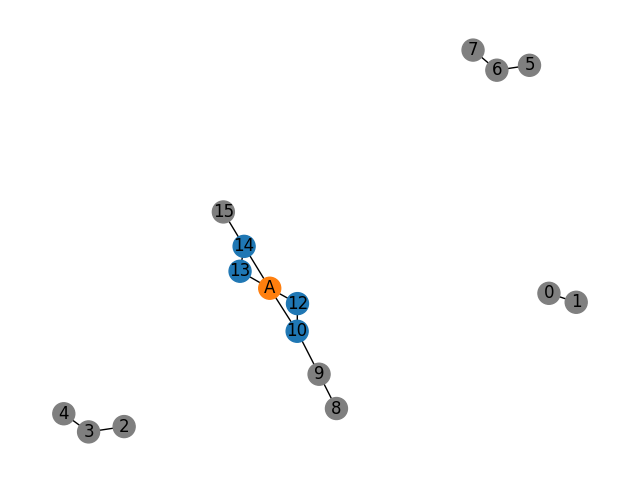


Node degree, kA: 4
Avg. degree: 1.75


In [32]:
edge_list = [
    (0, 1),
    (2, 3),
    (3, 4),
    (5, 6),
    (6, 7),
    (8, 9),
    (9, 10),
    (10, "A"),
    (10, 12),
    ("A", 12),
    ("A", 13),
    ("A", 14),
    (13, 14),
    (14, 15),
]
G = nx.Graph(edge_list)
avg_degree = 2 * G.number_of_edges() / G.number_of_nodes()

label_to_color = {
    10: "tab:blue",
    "A": "tab:orange",
    12: "tab:blue",
    13: "tab:blue",
    14: "tab:blue"
}
node_colors = [label_to_color.get(node, "tab:grey") for node in G.nodes()]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.set_axis_off()
ax = fig.add_subplot(1, 1, 1)
nx.draw_networkx(G, node_size=250, node_color=node_colors, with_labels=True, ax=ax)
plt.axis("off")
plt.show()

print(f"\nNode degree, kA: {G.degree['A']}")
print(f"Avg. degree: {avg_degree:.2f}")

## Directed

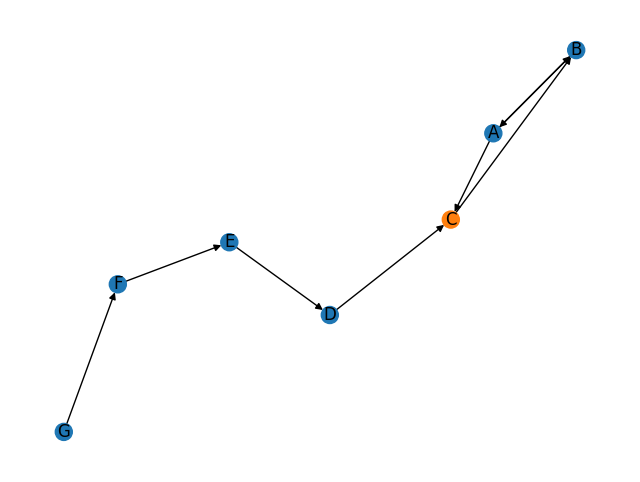


Node in-degree, kC: 2
Node out-degree, kC: 1
Node degree, kC: 3
Avg. degree: 1.14


In [33]:
edge_list = [
    ("A", "B"),
    ("A", "C"),
    ("B", "A"),
    ("C", "B"),
    ("D", "C"),
    ("E", "D"),
    ("F", "E"),
    ("G", "F")
    ]
G = nx.DiGraph(edge_list)
avg_degree = G.number_of_edges() / G.number_of_nodes()

label_to_color = {"C": "tab:orange"}
node_colors = [label_to_color.get(node, "tab:blue") for node in G.nodes()]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.set_axis_off()
ax = fig.add_subplot(1, 1, 1)
nx.draw(G, node_size=150, node_color=node_colors, with_labels=True, ax=ax)
plt.show()

print(f"\nNode in-degree, kC: {G.in_degree['C']}")
print(f"Node out-degree, kC: {G.out_degree['C']}")
print(f"Node degree, kC: {G.degree['C']}")
print(f"Avg. degree: {avg_degree:.2f}")

Number of nodes: 10
Number of edges: 30


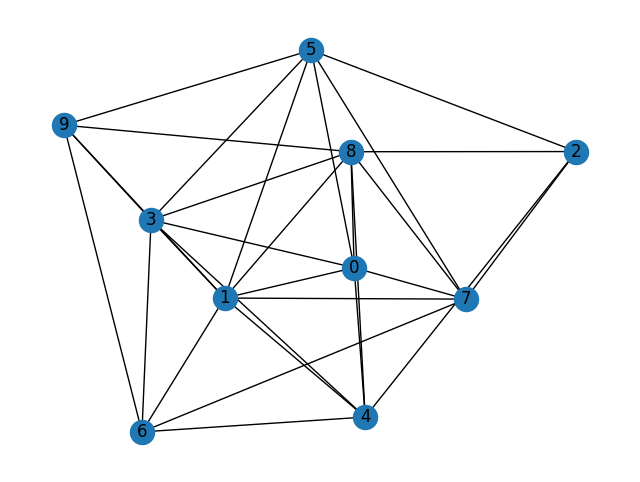

In [37]:
# Generate a random graph with 10 nodes and 30 edges
G = nx.gnm_random_graph(10, 30)

# Display the number of nodes and edges
print("Number of nodes:", len(G.nodes))
print("Number of edges:", len(G.edges))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.set_axis_off()
ax = fig.add_subplot(1, 1, 1)
nx.draw_networkx(G, with_labels=True, ax=ax)
plt.axis("off")
plt.show()

# Calculate the average degree of nodes 6 and 15

In [38]:
G.degree([6, 15])

DegreeView({6: 5})

# Bipartite Graph

In [39]:
def draw_bipartite(
    G: nx.Graph,
    node1_color: str = "tab:orange",
    node2_color: str = "tab:blue",
    node1_shape: str = "o",
    node2_shape: str = "s",
    set1_name: str = "U",
    set2_name: str = "V",
    text_size: int = 16,
    font_weight: str = "bold",
) -> None:

    U, V = nx.bipartite.sets(G)
    len_U = len(U)
    len_V = len(V)
    len_max = max(len_U, len_V)
    offset = (len_U - len_V) / 2

    pos = dict()
    pos.update((n, (1, i)) for i, n in enumerate(sorted(U, reverse=True), 1)) # put nodes from U at x=1
    pos.update((n, (2, i + offset)) for i, n in enumerate(sorted(V, reverse=True), 1)) # put nodes from V at x=2

    nx.draw_networkx_nodes(U, pos=pos, node_color=node1_color, node_shape=node1_shape)
    nx.draw_networkx_nodes(V, pos=pos, node_color=node2_color, node_shape=node2_shape)
    nx.draw_networkx_labels(G, pos=pos)
    nx.draw_networkx_edges(G, pos=pos, width=2)

    plt.text(0.95, len_max + 0.75, set1_name, size=text_size, fontweight=font_weight)
    plt.text(1.95, len_max + 0.75, set2_name, size=text_size, fontweight=font_weight)

    plt.axis("off")

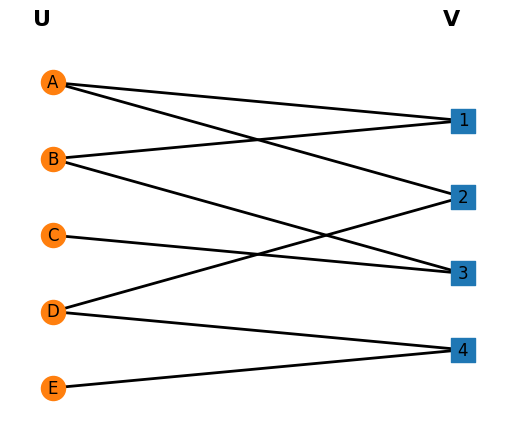

In [40]:
G = nx.Graph()
# Add nodes with the node attribute "bipartite"
G.add_nodes_from(["A", "B", "C", "D", "E"], bipartite=0)
G.add_nodes_from([1, 2, 3, 4], bipartite=1)
# Add edges only between nodes of opposite node sets
G.add_edges_from([("A", 1), ("A", 2), ("B", 1), ("B", 3), ("C", 3), ("D", 2), ("D", 4), ("E", 4)])

# plt.figure(figsize=(3, 4))
draw_bipartite(G)
# plt.show()

# Folded/Projected Bipartite Graphs

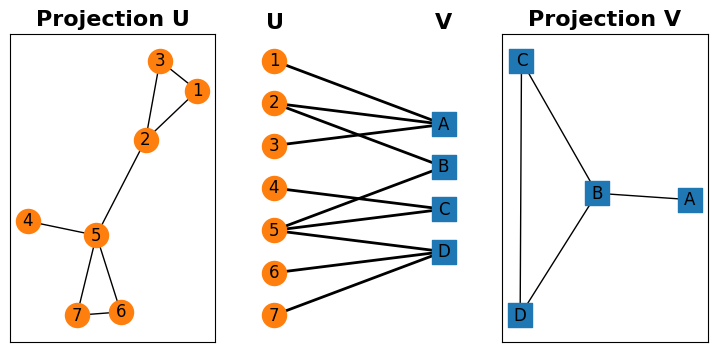

In [66]:
G = nx.Graph()
# Add nodes with the node attribute "bipartite"
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7], bipartite=0)
G.add_nodes_from(["A", "B", "C", "D"], bipartite=1)
# Add edges only between nodes of opposite node sets
G.add_edges_from([(1, "A"), (2, "A"), (2, "B"), (3, "A"), (4, "C"), (5, "B"), (5, "C"), (5, "D"), (6, "D"), (7, "D")])

U, V = nx.bipartite.sets(G)
U_proj = nx.algorithms.bipartite.projected_graph(G, V)
V_proj = nx.algorithms.bipartite.projected_graph(G, U)

plt.figure(figsize=(9, 4))

plt.subplot(131)
plt.title("Projection U", size=16, fontweight="bold")
nx.draw_networkx(V_proj, with_labels=True, node_color="tab:orange", node_shape="o")

plt.subplot(132)
draw_bipartite(G)

plt.subplot(133)
plt.title("Projection V", size=16, fontweight="bold")
nx.draw_networkx(U_proj, with_labels=True, node_color="tab:blue", node_shape="s")

plt.show()

# Representing Graphs: Adjacency Matrix

## Undirected

Print the adjacency matrix, the degrees of each node, and the number of edges in the graph.

In [42]:
! pip install scipy

  Using cached scipy-1.14.1-cp310-cp310-win_amd64.whl (44.8 MB)



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


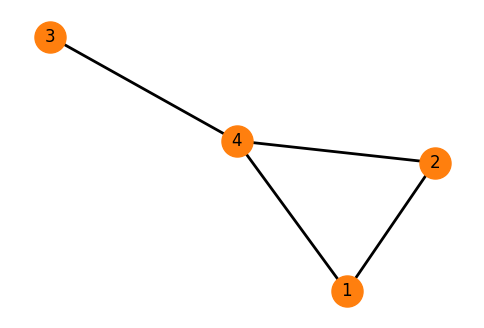


A:
[[0 1 1 0]
 [1 0 1 0]
 [1 1 0 1]
 [0 0 1 0]]

ki: [2 2 3 1]
kj: [2 2 3 1]
# of edges (L): 4.0


In [43]:
edge_list = [
    (1, 2),
    (4, 3),
    (1, 4),
    (2, 4)
    ]
G = nx.Graph(edge_list)
A = nx.adjacency_matrix(G).todense()
ki = A.sum(axis=0).flatten()
kj = A.sum(axis=1).flatten()
L = 0.5 * ki.sum()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.set_axis_off()
ax = fig.add_subplot(1, 1, 1)
nx.draw_networkx(G, node_color="tab:orange", node_size=500, width=2, with_labels=True)
plt.axis("off")
plt.show()

print(f"\nA:\n{A}")
print(f"\nki: {ki}")
print(f"kj: {kj}")
print(f"# of edges (L): {L}")

## Directed

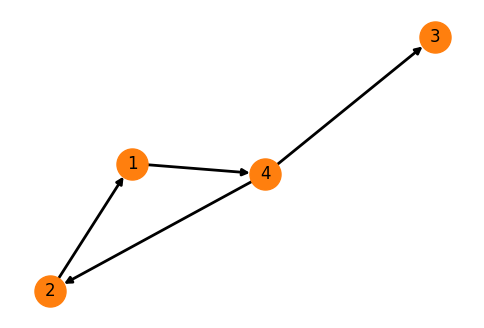


A:
[[0 1 0 0]
 [0 0 1 1]
 [1 0 0 0]
 [0 0 0 0]]

ki_out: [1 2 1 0]
kj_in: [1 1 1 1]
# of edges (L): 4


In [67]:
edge_list = [(1, 4), (2, 1), (4, 2), (4, 3)]
G = nx.DiGraph(edge_list)
A = nx.adjacency_matrix(G).todense()
ki_out = A.sum(axis=1).flatten()
kj_in = A.sum(axis=0).flatten()
L = kj_in.sum()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.set_axis_off()
ax = fig.add_subplot(1, 1, 1)
nx.draw(G, node_color="tab:orange", node_size=500, width=2, with_labels=True, ax=ax)
plt.show()

print(f"\nA:\n{A}")
print(f"\nki_out: {ki_out}")
print(f"kj_in: {kj_in}")
print(f"# of edges (L): {L}")

# Representing Graphs: Edge list

**Create a directed graph with the following edge list:**

edge_list = [(2, 3), (2, 4), (3, 2), (3, 4), (4, 5), (5, 2), (5, 1)]

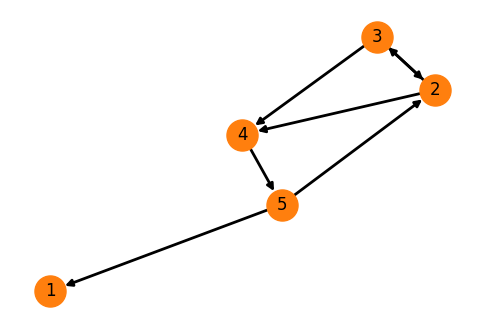


Edge list: [(2, 3), (2, 4), (3, 2), (3, 4), (4, 5), (5, 2), (5, 1)]


In [69]:
edge_list = [(2, 3), (2, 4), (3, 2), (3, 4), (4, 5), (5, 2), (5, 1)]
G = nx.DiGraph(edge_list)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.set_axis_off()
ax = fig.add_subplot(1, 1, 1)
nx.draw(G, node_color="tab:orange", node_size=500, width=2, with_labels=True, ax=ax)
A = nx.adjacency_matrix(G)
plt.show()

print(f"\nEdge list: {G.edges}")

# Representing Graphs: Adjacency list

In [70]:
def print_adjacency_list(G: nx.Graph) -> None:
    print("Adjacency list:")
    for item in sorted(nx.generate_adjlist(G)):
        item = item.split(" ")
        key = item[0]
        values = ", ".join(item[1:])
        print(f"{key}: {values}")

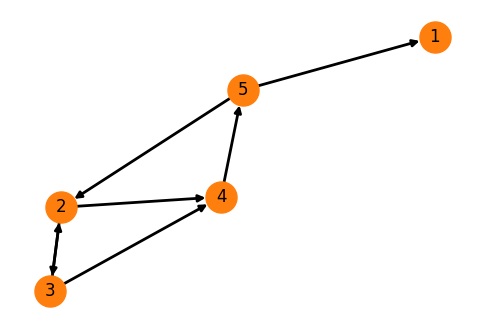


Adjacency list:
1: 
2: 3, 4
3: 2, 4
4: 5
5: 2, 1


In [71]:
edge_list = [(2, 3), (2, 4), (3, 2), (3, 4), (4, 5), (5, 2), (5, 1)]
G = nx.DiGraph(edge_list)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.set_axis_off()
ax = fig.add_subplot(1, 1, 1)
nx.draw(G, node_color="tab:orange", node_size=500, width=2, with_labels=True)
plt.show()

print()
print_adjacency_list(G)

# More Types of Graphs

## Unweighted
(undirected)

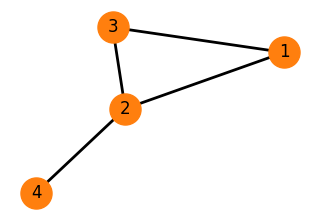


A:
[[0 1 1 0]
 [1 0 1 1]
 [1 1 0 0]
 [0 1 0 0]]

Avg. degree: 2.00


In [72]:
edge_list = [(1, 2), (1, 3), (2, 3), (2, 4)]
G = nx.Graph(edge_list)
A = nx.adjacency_matrix(G).todense()
E = A.sum() / 2
avg_degree = 2 * E / G.number_of_nodes()

plt.figure(figsize=(3, 2))
nx.draw(G, node_color="tab:orange", node_size=500, width=2, with_labels=True)
plt.show()

print(f"\nA:\n{A}")
print(f"\nAvg. degree: {avg_degree:.2f}")

## Weighted
(undirected)

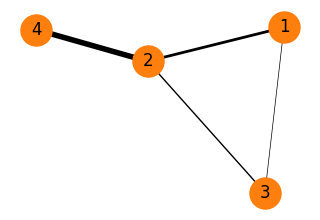


A:
[[0.  2.  0.5 0. ]
 [2.  0.  1.  4. ]
 [0.5 1.  0.  0. ]
 [0.  4.  0.  0. ]]

Avg. degree: 3.75


In [73]:
edge_list = [(1, 2, {"weight": 2}), (1, 3, {"weight": 0.5}), (2, 3, {"weight": 1}), (2, 4, {"weight": 4})]
G = nx.Graph(edge_list)
A = nx.adjacency_matrix(G).todense()
E = A.sum() / 2
avg_degree = 2 * E / G.number_of_nodes()

width = list(nx.get_edge_attributes(G, "weight").values())

plt.figure(figsize=(3, 2))
nx.draw(G, node_color="tab:orange", node_size=500, width=width, with_labels=True)
plt.show()

print(f"\nA:\n{A}")
print(f"\nAvg. degree: {avg_degree:.2f}")

## Self-edges (self-loops)
(undirected)

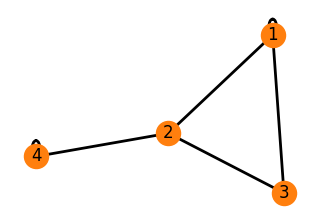


A:
[[1 1 1 0]
 [1 0 1 1]
 [1 1 0 0]
 [0 1 0 1]]

Avg. degree: 3.00


In [74]:
edge_list = [(1, 1), (1, 2), (1, 3), (2, 3), (2, 4), (4, 4)]
G = nx.Graph(edge_list)
A = nx.adjacency_matrix(G).todense()
E = 0.5 * (A.sum() + np.diagonal(A).sum())
avg_degree = 2 * E / G.number_of_nodes()

plt.figure(figsize=(3, 2))
nx.draw(G, node_color="tab:orange", node_size=300, width=2, with_labels=True)
plt.show()

print(f"\nA:\n{A}")
print(f"\nAvg. degree: {avg_degree:.2f}")

## Multigraph

A graph in which multiple edges may connect the same pair of vertices
(directed)

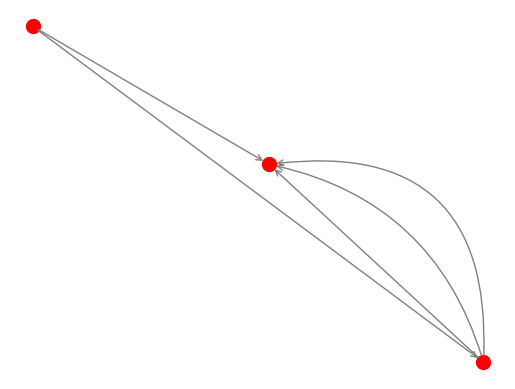

In [75]:
G=nx.MultiGraph ([(1,2),(1,2),(1,2),(3,1),(3,2)])
pos = nx.random_layout(G)
nx.draw_networkx_nodes(G, pos, node_color = 'r', node_size = 100, alpha = 1)
ax = plt.gca()
for e in G.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="->", color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])
                                ),
                                ),
                )
plt.axis('off')
plt.show()

# Connectivity of Undirected Graphs

## Connected

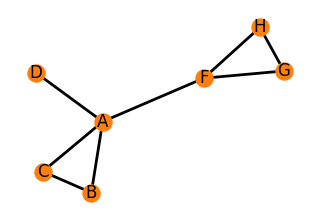

In [76]:
edge_list = [("A", "B"), ("A", "C"), ("A", "D"), ("A", "F"), ("B", "C"), ("F", "G"), ("F", "H"), ("G", "H")]
G = nx.Graph(edge_list)

plt.figure(figsize=(3, 2))
nx.draw(G, node_color="tab:orange", node_size=150, width=2, with_labels=True)
plt.show()

## Disconnected

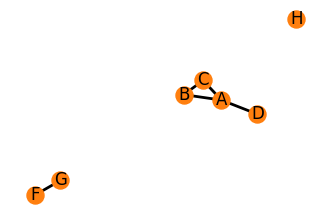


Giant Component: {'D', 'B', 'C', 'A'}
Isolated nodes: [{'H'}]


In [77]:
edge_list = [("A", "B"), ("A", "C"), ("A", "D"), ("B", "C"), ("F", "G")]
G = nx.Graph(edge_list)
G.add_node("H")
connected_components = sorted(nx.connected_components(G), key=len, reverse=True)
giant_component = connected_components[0]
isolated_nodes = [cc for cc in connected_components if len(cc) == 1]

plt.figure(figsize=(3, 2))
nx.draw(G, node_color="tab:orange", node_size=150, width=2, with_labels=True)
plt.show()

print(f"\nGiant Component: {giant_component}")
print(f"Isolated nodes: {isolated_nodes}")

# Connectivity: Example

## Disconnected

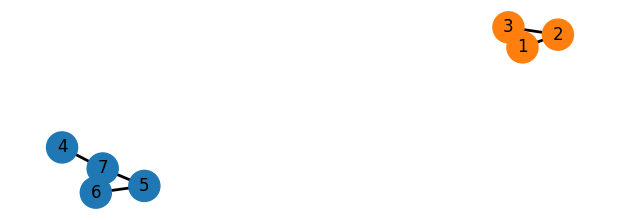


A:
[[0 1 1 0 0 0 0]
 [1 0 1 0 0 0 0]
 [1 1 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 1 0 1 1]
 [0 0 0 0 1 0 1]
 [0 0 0 0 1 1 0]]


In [78]:
edge_list = [(1, 2), (1, 3), (2, 3), (4, 7), (5, 6), (5, 7), (6, 7)]
G = nx.Graph(edge_list)
A = nx.adjacency_matrix(G).todense()

node_colors = ["tab:orange" if node in {1, 2, 3} else "tab:blue" for node in G.nodes]

plt.figure(figsize=(6, 2))
nx.draw(G, node_color=node_colors, node_size=500, width=2, with_labels=True)
plt.show()

print(f"\nA:\n{A}")

## Connected

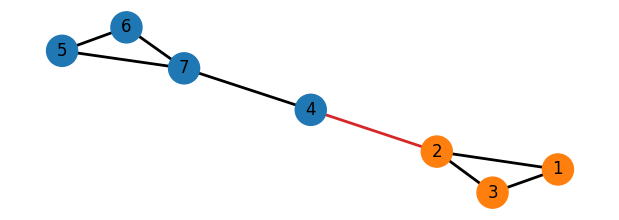


A:
[[0 1 1 0 0 0 0]
 [1 0 1 1 0 0 0]
 [1 1 0 0 0 0 0]
 [0 1 0 0 1 0 0]
 [0 0 0 1 0 1 1]
 [0 0 0 0 1 0 1]
 [0 0 0 0 1 1 0]]


In [79]:
edge_list = [(1, 2), (1, 3), (2, 3), (2, 4), (4, 7), (5, 6), (5, 7), (6, 7)]
G = nx.Graph(edge_list)
A = nx.adjacency_matrix(G).todense()

node_colors = ["tab:orange" if node in {1, 2, 3} else "tab:blue" for node in G.nodes]
edge_colors = ["tab:red" if edge == (2, 4) else "black" for edge in G.edges]

plt.figure(figsize=(6, 2))
nx.draw(G, node_color=node_colors, node_size=500, edge_color=edge_colors, width=2, with_labels=True)
plt.show()

print(f"\nA:\n{A}")

# Connectivity of Directed Graphs

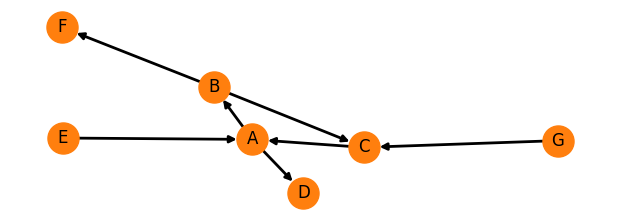


Is strongly connected? False
Is weakly connected? True


In [80]:
edge_list = [("A", "B"), ("B", "C"), ("C", "A"), ("E", "A"), ("A", "D"), ("B", "F"), ("G", "C")]
G = nx.DiGraph(edge_list)

plt.figure(figsize=(6, 2))
nx.draw(G, node_color="tab:orange", node_size=500, width=2, with_labels=True)
plt.show()

print(f"\nIs strongly connected? {nx.is_strongly_connected(G)}")
print(f"Is weakly connected? {nx.is_weakly_connected(G)}")

In [81]:
def get_strongly_connected_components(G: nx.Graph) -> List[dict]:
    return sorted([scc for scc in nx.strongly_connected_components(G) if len(scc) > 1], key=len, reverse=True)

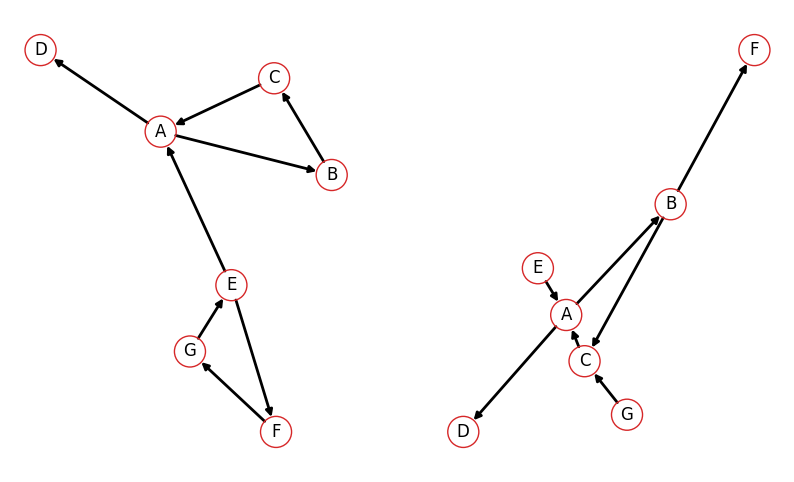


G1 strongly connected components (excluding isolated nodes): [{'B', 'C', 'A'}, {'E', 'F', 'G'}]
G2 strongly connected components (excluding isolated nodes): [{'B', 'C', 'A'}]


In [82]:
edge_list1 = [
    ("A", "B"),
    ("A", "D"),
    ("B", "C"),
    ("C", "A"),
    ("E", "A"),
    ("A", "D"),
    ("G", "E"),
    ("E", "F"),
    ("F", "G"),
]
G1 = nx.DiGraph(edge_list1)
SCCs1 = get_strongly_connected_components(G1)

edge_list2 = [("A", "B"), ("B", "C"), ("C", "A"), ("E", "A"), ("A", "D"), ("B", "F"), ("G", "C")]
G2 = nx.DiGraph(edge_list2)
SCCs2 = get_strongly_connected_components(G2)

plt.figure(figsize=(10, 6))

plt.subplot(121)
nx.draw(G1, edgecolors="tab:red", node_color="none", node_size=500, width=2, with_labels=True)

plt.subplot(122)
nx.draw(G2, edgecolors="tab:red", node_color="none", node_size=500, width=2, with_labels=True)

plt.show()

print(f"\nG1 strongly connected components (excluding isolated nodes): {SCCs1}")
print(f"G2 strongly connected components (excluding isolated nodes): {SCCs2}")